In [3]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report


In [4]:
data = pd.read_csv(r"credit_score.csv")
data.head()

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good


In [3]:
pd.set_option('display.max_columns', None)

data.describe(include='all')

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000000,87495,81317,8.749500e+04,74319.000000,87495.000000,87495.000000,87495.000000,87495.000000,77583,87495.000000,81400.000000,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,NaN,NaN,NaN,6260,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,NaN,NaN,NaN,1208,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467364,NaN,NaN,1.802404e+05,4193.181285,17.112646,22.664792,73.050871,7.019841,NaN,21.060403,30.904324,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,NaN,NaN,NaN,686.549658,NaN,NaN,1.455212e+06,3179.195651,117.428586,129.806747,467.727237,60.352339,NaN,14.864558,225.495250,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,NaN,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.943348e+04,1626.677917,3.000000,4.000000,8.000000,1.000000,NaN,10.000000,9.000000,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757975e+04,3095.905000,6.000000,5.000000,13.000000,3.000000,NaN,18.000000,14.000000,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.288608e+04,5967.930000,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,18.000000,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


In [4]:
data.dtypes

ID                         object
CustomerID                 object
Month                      object
Name                       object
Age                         int64
SSN                        object
Occupation                 object
AnnualIncome              float64
MonthlyInhandSalary       float64
NumBankAccounts             int64
NumCreditCard               int64
InterestRate                int64
NumofLoan                   int64
TypeofLoan                 object
Delayfromduedate            int64
NumofDelayedPayment       float64
ChangedCreditLimit        float64
NumCreditInquiries        float64
OutstandingDebt           float64
CreditUtilizationRatio    float64
PaymentofMinAmount         object
TotalEMIpermonth          float64
Amountinvestedmonthly     float64
PaymentBehaviour           object
MonthlyBalance            float64
CreditScore                object
dtype: object

In [5]:
data.CreditScore.value_counts()

Standard    46651
Poor        25350
Good        15494
Name: CreditScore, dtype: int64

In [6]:
data['score'] = np.where(data['CreditScore']!='Poor',0,1)
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


In [7]:
data.score.value_counts()

0    62145
1    25350
Name: score, dtype: int64

In [8]:
data.columns

Index(['ID', 'CustomerID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'AnnualIncome', 'MonthlyInhandSalary', 'NumBankAccounts',
       'NumCreditCard', 'InterestRate', 'NumofLoan', 'TypeofLoan',
       'Delayfromduedate', 'NumofDelayedPayment', 'ChangedCreditLimit',
       'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio',
       'PaymentofMinAmount', 'TotalEMIpermonth', 'Amountinvestedmonthly',
       'PaymentBehaviour', 'MonthlyBalance', 'CreditScore', 'score'],
      dtype='object')

In [9]:
for i in data[['ID', 'CustomerID', 'Name', 'TypeofLoan', 'SSN', 'CreditScore']]:
    data.drop(i,axis=1,inplace=True)

In [10]:
data.columns

Index(['Month', 'Age', 'Occupation', 'AnnualIncome', 'MonthlyInhandSalary',
       'NumBankAccounts', 'NumCreditCard', 'InterestRate', 'NumofLoan',
       'Delayfromduedate', 'NumofDelayedPayment', 'ChangedCreditLimit',
       'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio',
       'PaymentofMinAmount', 'TotalEMIpermonth', 'Amountinvestedmonthly',
       'PaymentBehaviour', 'MonthlyBalance', 'score'],
      dtype='object')

In [11]:
data.isnull().sum()

Month                         0
Age                           0
Occupation                 6178
AnnualIncome                  0
MonthlyInhandSalary       13176
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
Delayfromduedate              0
NumofDelayedPayment        6095
ChangedCreditLimit         1841
NumCreditInquiries         1706
OutstandingDebt               0
CreditUtilizationRatio        0
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      7709
PaymentBehaviour              0
MonthlyBalance             1058
score                         0
dtype: int64

In [12]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i].fillna(data[i].mode()[0], inplace=True)
    else:
        data[i].fillna(data[i].mean(), inplace=True)

In [13]:
data.isnull().sum()

Month                     0
Age                       0
Occupation                0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
OutstandingDebt           0
CreditUtilizationRatio    0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
score                     0
dtype: int64

In [14]:
data.columns

Index(['Month', 'Age', 'Occupation', 'AnnualIncome', 'MonthlyInhandSalary',
       'NumBankAccounts', 'NumCreditCard', 'InterestRate', 'NumofLoan',
       'Delayfromduedate', 'NumofDelayedPayment', 'ChangedCreditLimit',
       'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio',
       'PaymentofMinAmount', 'TotalEMIpermonth', 'Amountinvestedmonthly',
       'PaymentBehaviour', 'MonthlyBalance', 'score'],
      dtype='object')

In [15]:
import numpy as np
import pandas as pd

for var in data.columns[:-1]:
    if data[var].dtypes != object:
        q1 = data[var].quantile(0.25)
        q2 = data[var].quantile(0.5)
        q3 = data[var].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        data['category_' + var] = pd.cut(data[var], bins=ranges, duplicates='drop')

        grouped = data.groupby(['category_' + var, 'score'])['score'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        data = data.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)
        
data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,score,category_Age,Age_woe,category_AnnualIncome,AnnualIncome_woe,category_MonthlyInhandSalary,MonthlyInhandSalary_woe,category_NumBankAccounts,NumBankAccounts_woe,category_NumCreditCard,NumCreditCard_woe,category_InterestRate,InterestRate_woe,category_NumofLoan,NumofLoan_woe,category_Delayfromduedate,Delayfromduedate_woe,category_NumofDelayedPayment,NumofDelayedPayment_woe,category_ChangedCreditLimit,ChangedCreditLimit_woe,category_NumCreditInquiries,NumCreditInquiries_woe,category_OutstandingDebt,OutstandingDebt_woe,category_CreditUtilizationRatio,CreditUtilizationRatio_woe,category_TotalEMIpermonth,TotalEMIpermonth_woe,category_Amountinvestedmonthly,Amountinvestedmonthly_woe,category_MonthlyBalance,MonthlyBalance_woe
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.000000,11.270000,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(1792.52, 3860.632]",0.163879,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(-inf, 9.0]",0.651120,"(9.56, 14.64]",0.131787,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(-inf, 28.059]",-0.085018,"(30.453, 69.286]",-0.143113,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030
1,February,23,Scientist,19114.12,4193.181285,3,4,3,4,-1,30.904324,11.270000,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(3860.632, 5376.237]",-0.157230,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(19.0, inf]",-0.642278,"(9.56, 14.64]",0.131787,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(28.059, 32.322]",-0.013608,"(30.453, 69.286]",-0.143113,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030
2,March,-500,Scientist,19114.12,4193.181285,3,4,3,4,3,7.000000,10.385851,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(3860.632, 5376.237]",-0.157230,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(-inf, 9.0]",0.651120,"(9.56, 14.64]",0.131787,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(28.059, 32.322]",-0.013608,"(30.453, 69.286]",-0.143113,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030
3,April,23,Scientist,19114.12,4193.181285,3,4,3,4,5,4.000000,6.270000,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(3860.632, 5376.237]",-0.157230,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(-inf, 9.0]",0.651120,"(5.425, 9.56]",0.039621,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(28.059, 32.322]",-0.013608,"(30.453, 69.286]",-0.143113,"(143.313, 219.931]",0.015442,"(-inf, 270.918]",-0.489969
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,30.904324,11.270000,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(1792.52, 3860.632]",0.163879,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(19.0, inf]",-0.642278,"(9.56, 14.64]",0.131787,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(-inf, 28.059]",-0.085018,"(30.453, 69.286]",-0.143113,"(-inf, 76.962]",-0.200594,"(338.591, 467.662]",0.214456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [16]:
for var in data.columns:
    if data[var].dtypes==object:
        grouped = data.groupby([var, 'score'])['score'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
        data = data.merge(grouped[[var,var+'_woe']], how='left', on=var)

data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,score,category_Age,Age_woe,category_AnnualIncome,AnnualIncome_woe,category_MonthlyInhandSalary,MonthlyInhandSalary_woe,category_NumBankAccounts,NumBankAccounts_woe,category_NumCreditCard,NumCreditCard_woe,category_InterestRate,InterestRate_woe,category_NumofLoan,NumofLoan_woe,category_Delayfromduedate,Delayfromduedate_woe,category_NumofDelayedPayment,NumofDelayedPayment_woe,category_ChangedCreditLimit,ChangedCreditLimit_woe,category_NumCreditInquiries,NumCreditInquiries_woe,category_OutstandingDebt,OutstandingDebt_woe,category_CreditUtilizationRatio,CreditUtilizationRatio_woe,category_TotalEMIpermonth,TotalEMIpermonth_woe,category_Amountinvestedmonthly,Amountinvestedmonthly_woe,category_MonthlyBalance,MonthlyBalance_woe,Month_woe,Occupation_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.000000,11.270000,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(1792.52, 3860.632]",0.163879,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(-inf, 9.0]",0.651120,"(9.56, 14.64]",0.131787,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(-inf, 28.059]",-0.085018,"(30.453, 69.286]",-0.143113,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,0.013036,-0.080783,0.97376,0.087011
1,February,23,Scientist,19114.12,4193.181285,3,4,3,4,-1,30.904324,11.270000,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(3860.632, 5376.237]",-0.157230,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(19.0, inf]",-0.642278,"(9.56, 14.64]",0.131787,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(28.059, 32.322]",-0.013608,"(30.453, 69.286]",-0.143113,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,0.031453,-0.080783,0.97376,0.057730
2,March,-500,Scientist,19114.12,4193.181285,3,4,3,4,3,7.000000,10.385851,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(3860.632, 5376.237]",-0.157230,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(-inf, 9.0]",0.651120,"(9.56, 14.64]",0.131787,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(28.059, 32.322]",-0.013608,"(30.453, 69.286]",-0.143113,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,0.021323,-0.080783,0.97376,-0.070569
3,April,23,Scientist,19114.12,4193.181285,3,4,3,4,5,4.000000,6.270000,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(3860.632, 5376.237]",-0.157230,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(-inf, 9.0]",0.651120,"(5.425, 9.56]",0.039621,"(3.0, 6.0]",0.558452,"(566.4, 1166.23]",1.209568,"(28.059, 32.322]",-0.013608,"(30.453, 69.286]",-0.143113,"(143.313, 219.931]",0.015442,"(-inf, 270.918]",-0.489969,-0.017560,-0.080783,0.97376,-0.315796
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,30.904324,11.270000,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,0,"(-inf, 24.0]",-0.221890,"(-inf, 19433.48]",-0.544667,"(1792.52, 3860.632]",0.163879,"(-inf, 3.0]",0.775176,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(3.0, 5.0]",-0.105828,"(-inf, 10.0]",1.050763,"(19.0, inf]",-0.642278,"(9.56, 14.64]",0.131787,"(3.0, 6.0]",0.558452,"(566.4,

In [17]:
from scipy import stats


for i in data.columns:
    
    if data[i].dtype in ['int64', 'float64']:

        kstest_statistic, kstest_p_value = stats.kstest(data[i], 'norm')
        # 'norm' inside indicates that the test is comparing the distribution of the data against a normal distribution
        
        print(f'Column: {i}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: Age
Kolmogorov-Smirnov Test:
Test Statistic: 0.9904794559689125
p-value: 0.0
Data does not look normally distributed

Column: AnnualIncome
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: MonthlyInhandSalary
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: NumBankAccounts
Kolmogorov-Smirnov Test:
Test Statistic: 0.889153405396812
p-value: 0.0
Data does not look normally distributed

Column: NumCreditCard
Kolmogorov-Smirnov Test:
Test Statistic: 0.9558429305125329
p-value: 0.0
Data does not look normally distributed

Column: InterestRate
Kolmogorov-Smirnov Test:
Test Statistic: 0.9505969164545867
p-value: 0.0
Data does not look normally distributed

Column: NumofLoan
Kolmogorov-Smirnov Test:
Test Statistic: 0.724195407796949
p-value: 0.0
Data does not look normally distributed

Column: Delayfromduedate
Kolmogorov-Smirnov Test:
Test Statistic: 0.953961834067347
p-va

In [21]:
def target_correlation(data, target, threshold=0.1):
    
    woe_features = data.filter(regex='_woe$', axis=1)  # Select only _woe features
    woe_features[target] = data[target] 
    
    corr_matrix = woe_features.corr(method='spearman')
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


target_result = target_correlation(data, 'score')

target_result

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_84236/3477286582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  woe_features[target] = data[target]


,Variable,Correlation with Target
0,Age_woe,-0.102439
1,AnnualIncome_woe,-0.199462
2,MonthlyInhandSalary_woe,-0.174459
3,NumBankAccounts_woe,-0.262026
4,NumCreditCard_woe,-0.314837
5,InterestRate_woe,-0.406848
6,NumofLoan_woe,-0.287626
7,Delayfromduedate_woe,-0.338427
8,NumofDelayedPayment_woe,-0.222047
9,NumCreditInquiries_woe,-0.360778


In [22]:

def intercorrelation(data, target, threshold=0.7):
    
    woe_features = data.filter(regex='_woe$', axis=1) 
    
    corr_matrix = woe_features.corr(method='spearman')
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
            
   # print(correlated_pairs_set)
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

# Example usage
intercorrelated_result = intercorrelation(data, 'score')
intercorrelated_result


,Variable 1,Variable 2
0,AnnualIncome_woe,MonthlyInhandSalary_woe


In [23]:
target_result.Variable.tolist()

['Age_woe',
 'AnnualIncome_woe',
 'MonthlyInhandSalary_woe',
 'NumBankAccounts_woe',
 'NumCreditCard_woe',
 'InterestRate_woe',
 'NumofLoan_woe',
 'Delayfromduedate_woe',
 'NumofDelayedPayment_woe',
 'NumCreditInquiries_woe',
 'OutstandingDebt_woe',
 'MonthlyBalance_woe',
 'PaymentofMinAmount_woe',
 'PaymentBehaviour_woe']

In [25]:
data_woe = data[['Age_woe',
 'AnnualIncome_woe',
 'MonthlyInhandSalary_woe',
 'NumBankAccounts_woe',
 'NumCreditCard_woe',
 'InterestRate_woe',
 'NumofLoan_woe',
 'Delayfromduedate_woe',
 'NumofDelayedPayment_woe',
 'NumCreditInquiries_woe',
 'OutstandingDebt_woe',
 'MonthlyBalance_woe',
 'PaymentofMinAmount_woe',
 'PaymentBehaviour_woe','score']]

data_woe

,Age_woe,AnnualIncome_woe,MonthlyInhandSalary_woe,NumBankAccounts_woe,NumCreditCard_woe,InterestRate_woe,NumofLoan_woe,Delayfromduedate_woe,NumofDelayedPayment_woe,NumCreditInquiries_woe,OutstandingDebt_woe,MonthlyBalance_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe,score
0,-0.221890,-0.544667,0.163879,0.775176,1.077752,0.963156,-0.105828,1.050763,0.651120,0.558452,1.209568,-0.237030,0.97376,0.087011,0
1,-0.221890,-0.544667,-0.157230,0.775176,1.077752,0.963156,-0.105828,1.050763,-0.642278,0.558452,1.209568,-0.237030,0.97376,0.057730,0
2,-0.221890,-0.544667,-0.157230,0.775176,1.077752,0.963156,-0.105828,1.050763,0.651120,0.558452,1.209568,-0.237030,0.97376,-0.070569,0
3,-0.221890,-0.544667,-0.157230,0.775176,1.077752,0.963156,-0.105828,1.050763,0.651120,0.558452,1.209568,-0.489969,0.97376,-0.315796,0
4,-0.221890,-0.544667,0.163879,0.775176,1.077752,0.963156,-0.105828,1.050763,-0.642278,0.558452,1.209568,0.214456,0.97376,0.182672,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,-0.115648,-0.188143,0.163879,0.323347,-0.078484,0.963156,0.320772,-0.100916,0.651120,1.102930,1.271917,0.214456,0.97376,0.182672,1
87491,-0.115648,-0.188143,0.163879,0.323347,-0.078484,0.963156,0.320772,-0.100916,0.651120,1.102930,1.271917,0.683625,0.97376,0.391003,1
87492,-0.115648,-0.188143,0.163879,0.323347,-0.078484,0.963156,0.320772,0.496847,0.651120,1.102930,1.271917,0.683625,0.97376,0.182672,1
87493,-0.115648,-0.188143,0.163879,0.323347,-0.078484,-1.376154,0.320772,-0.100916,0.651120,1.102930,1.271917,0.683625,0.97376,0.391003,1


In [43]:
inputs = data_woe.drop('score', axis=1)
output = data_woe['score']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [28]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

def evaluate(model, X_train, y_train, X_test, y_test):
    
    '''Predictions and probabilities for the training set'''
    
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    '''Predictions and probabilities for the test set'''
    
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    '''Calculate metrics for the training set''' 
    
    roc_train_prob = roc_auc_score(y_train, y_train_prob)
    gini_train_prob = roc_train_prob * 2 - 1
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)

    '''Calculate metrics for the test set'''
    
    roc_test_prob = roc_auc_score(y_test, y_test_prob)
    gini_test_prob = roc_test_prob * 2 - 1
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results = pd.DataFrame({
        'Dataset': ['Train', 'Test'],
        'Gini': [gini_train_prob * 100, gini_test_prob * 100],
        'Precision': [precision_train, precision_test],
        'Recall': [recall_train, recall_test]
    })

    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    
    return results , confusion_matrix

In [29]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [31]:
result = evaluate(clf, X_train, y_train, X_test, y_test)

result

(  Dataset       Gini  Precision    Recall
 0   Train  59.410125   0.635937  0.566367
 1    Test  58.740368   0.627941  0.557951,
 array([[16066,  2530],
        [ 3383,  4270]]))

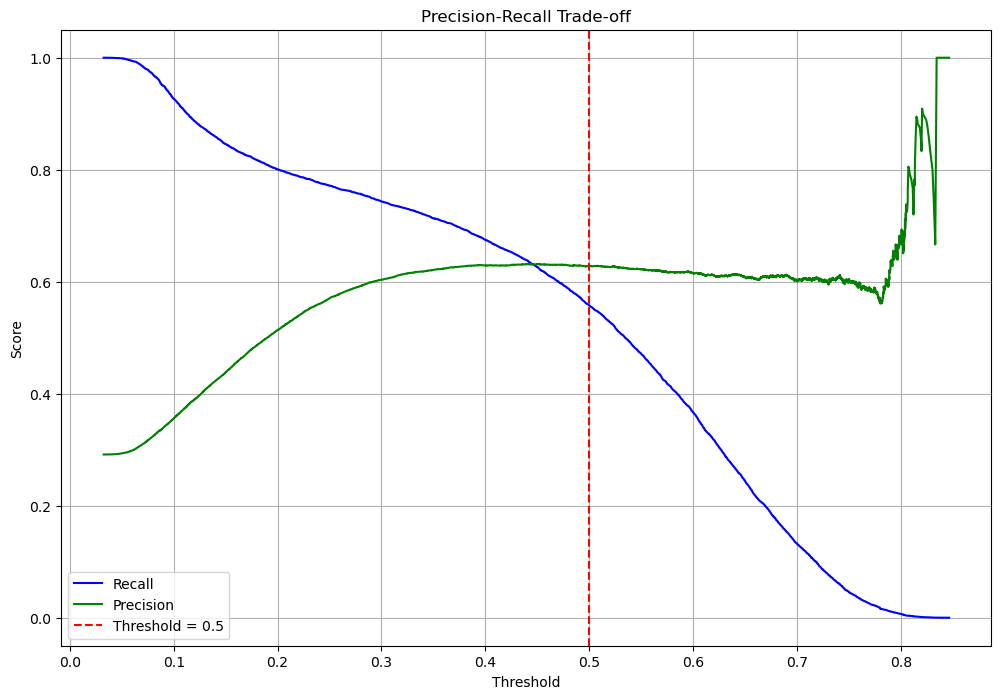

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_prob = clf.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(12, 8))
plt.plot(thresholds, recall[:-1], label='Recall', color='blue')
plt.plot(thresholds, precision[:-1], label='Precision', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.legend()
plt.grid(True)
plt.show()

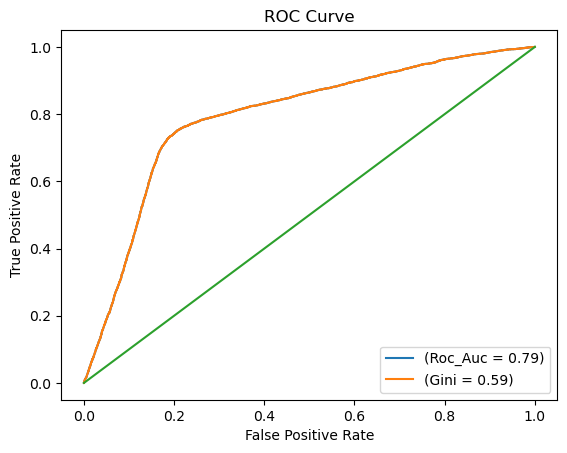

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [36]:
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Create lists to store the variables, ROC AUC scores, and Gini scores
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    # Fit a classifier using the single variable on the training set
    clf.fit(X_train_single_var, y_train)
    y_pred_train_single_var = clf.predict_proba(X_train_single_var)[:, 1]

    # Calculate ROC AUC score for the single variable model on the training set
    train_roc = roc_auc_score(y_train, y_pred_train_single_var)

    # Calculate Gini score for the single variable model on the training set
    train_gini = 2 * train_roc - 1

    # Fit a classifier using the single variable on the test set
    y_pred_test_single_var = clf.predict_proba(X_test_single_var)[:, 1]

    # Calculate ROC AUC score for the single variable model on the test set
    test_roc = roc_auc_score(y_test, y_pred_test_single_var)

    # Calculate Gini score for the single variable model on the test set
    test_gini = 2 * test_roc - 1

    # Append the results to the lists
    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)

# Create a DataFrame from the results
results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini': train_gini_scores,
    'Test Gini': test_gini_scores
})

# Sort the DataFrame by Test Gini score in descending order
results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

# Display the results
pd.options.display.float_format = '{:.4f}'.format
#pd.options.display.float_format = '{:.4%}'.format


results_df_sorted


,Variable,Train Gini,Test Gini
10,OutstandingDebt_woe,0.5153,0.5117
5,InterestRate_woe,0.5002,0.5011
9,NumCreditInquiries_woe,0.4459,0.4376
7,Delayfromduedate_woe,0.4229,0.4030
4,NumCreditCard_woe,0.3885,0.3752
6,NumofLoan_woe,0.3542,0.3531
3,NumBankAccounts_woe,0.3173,0.3229
12,PaymentofMinAmount_woe,0.3041,0.2976
8,NumofDelayedPayment_woe,0.2730,0.2740
1,AnnualIncome_woe,0.2478,0.2412


In [37]:
inputs = data_woe[['OutstandingDebt_woe', 'InterestRate_woe', 'NumCreditInquiries_woe',
       'Delayfromduedate_woe']]
output = data_woe['score']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [39]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [41]:
result = evaluate(clf, X_train, y_train, X_test, y_test)

In [42]:
result

(  Dataset    Gini  Precision  Recall
 0   Train 56.6131     0.6300  0.5831
 1    Test 55.9434     0.6268  0.5809,
 array([[15949,  2647],
        [ 3207,  4446]]))

# Deployment

In [47]:
import pandas as pd

test_data = pd.read_excel(r'test_data_real_values.xlsx')

test_data

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,CustomerID
0,632.9300,17,0,20,53115
1,3259.1700,24,11,53,35538
2,2313.6000,22,11,55,15150
3,556.8500,16,8,23,65145
4,1115.0600,6,3,16,23224
...,...,...,...,...,...
995,1360.3100,11,8,6,86109
996,1213.2600,11,6,22,62411
997,1509.7200,27,11,18,5554
998,356.6900,18,9,25,70288


In [48]:
data.category_OutstandingDebt.value_counts()

(1166.23, 1948.98]    21881
(-inf, 566.4]         21880
(566.4, 1166.23]      21873
(1948.98, inf]        21861
Name: category_OutstandingDebt, dtype: int64

In [49]:
ranges = [-np.inf, data['OutstandingDebt'].quantile(0.25), data['OutstandingDebt'].quantile(0.5), data['OutstandingDebt'].quantile(0.75), np.inf]  # np.inf for infinity
test_data['category_OutstandingDebt'] = pd.cut(test_data['OutstandingDebt'], bins=ranges)

test_data

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,CustomerID,category_OutstandingDebt
0,632.9300,17,0,20,53115,"(566.4, 1166.23]"
1,3259.1700,24,11,53,35538,"(1948.98, inf]"
2,2313.6000,22,11,55,15150,"(1948.98, inf]"
3,556.8500,16,8,23,65145,"(-inf, 566.4]"
4,1115.0600,6,3,16,23224,"(566.4, 1166.23]"
...,...,...,...,...,...,...
995,1360.3100,11,8,6,86109,"(1166.23, 1948.98]"
996,1213.2600,11,6,22,62411,"(1166.23, 1948.98]"
997,1509.7200,27,11,18,5554,"(1166.23, 1948.98]"
998,356.6900,18,9,25,70288,"(-inf, 566.4]"


In [50]:
test_data = test_data.merge(data[['category_OutstandingDebt','OutstandingDebt_woe']].drop_duplicates(subset='category_OutstandingDebt'), how='left', on='category_OutstandingDebt')

test_data

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,CustomerID,category_OutstandingDebt,OutstandingDebt_woe
0,632.9300,17,0,20,53115,"(566.4, 1166.23]",1.2096
1,3259.1700,24,11,53,35538,"(1948.98, inf]",-1.2232
2,2313.6000,22,11,55,15150,"(1948.98, inf]",-1.2232
3,556.8500,16,8,23,65145,"(-inf, 566.4]",1.2719
4,1115.0600,6,3,16,23224,"(566.4, 1166.23]",1.2096
...,...,...,...,...,...,...,...
995,1360.3100,11,8,6,86109,"(1166.23, 1948.98]",-0.3521
996,1213.2600,11,6,22,62411,"(1166.23, 1948.98]",-0.3521
997,1509.7200,27,11,18,5554,"(1166.23, 1948.98]",-0.3521
998,356.6900,18,9,25,70288,"(-inf, 566.4]",1.2719


In [51]:
columns_to_process = ['InterestRate', 'NumCreditInquiries', 'Delayfromduedate']

for i in columns_to_process:
    ranges = [-np.inf, data[i].quantile(0.25), data[i].quantile(0.5), data[i].quantile(0.75), np.inf]  
    test_data[f'category_{i}'] = pd.cut(test_data[i], bins=ranges)
    test_data = test_data.merge(data[[f'category_{i}', f'{i}_woe']].drop_duplicates(subset=f'category_{i}'), how='left', on=f'category_{i}')

test_data

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,CustomerID,category_OutstandingDebt,OutstandingDebt_woe,category_InterestRate,InterestRate_woe,category_NumCreditInquiries,NumCreditInquiries_woe,category_Delayfromduedate,Delayfromduedate_woe
0,632.9300,17,0,20,53115,"(566.4, 1166.23]",1.2096,"(13.0, 20.0]",-0.0280,"(-inf, 3.0]",1.1029,"(18.0, 28.0]",-0.1009
1,3259.1700,24,11,53,35538,"(1948.98, inf]",-1.2232,"(20.0, inf]",-1.3762,"(9.0, inf]",-1.0683,"(28.0, inf]",-1.0948
2,2313.6000,22,11,55,15150,"(1948.98, inf]",-1.2232,"(20.0, inf]",-1.3762,"(9.0, inf]",-1.0683,"(28.0, inf]",-1.0948
3,556.8500,16,8,23,65145,"(-inf, 566.4]",1.2719,"(13.0, 20.0]",-0.0280,"(6.0, 9.0]",-0.4761,"(18.0, 28.0]",-0.1009
4,1115.0600,6,3,16,23224,"(566.4, 1166.23]",1.2096,"(-inf, 8.0]",0.9632,"(-inf, 3.0]",1.1029,"(10.0, 18.0]",0.4968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1360.3100,11,8,6,86109,"(1166.23, 1948.98]",-0.3521,"(8.0, 13.0]",1.1494,"(6.0, 9.0]",-0.4761,"(-inf, 10.0]",1.0508
996,1213.2600,11,6,22,62411,"(1166.23, 1948.98]",-0.3521,"(8.0, 13.0]",1.1494,"(3.0, 6.0]",0.5585,"(18.0, 28.0]",-0.1009
997,1509.7200,27,11,18,5554,"(1166.23, 1948.98]",-0.3521,"(20.0, inf]",-1.3762,"(9.0, inf]",-1.0683,"(10.0, 18.0]",0.4968
998,356.6900,18,9,25,70288,"(-inf, 566.4]",1.2719,"(13.0, 20.0]",-0.0280,"(6.0, 9.0]",-0.4761,"(18.0, 28.0]",-0.1009


In [52]:
inputs.columns

Index(['OutstandingDebt_woe', 'InterestRate_woe', 'NumCreditInquiries_woe',
       'Delayfromduedate_woe'],
      dtype='object')

In [53]:
test_data_woe = test_data[['CustomerID','OutstandingDebt_woe', 'InterestRate_woe', 'NumCreditInquiries_woe',
       'Delayfromduedate_woe']]

test_data_woe

,CustomerID,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe
0,53115,1.2096,-0.0280,1.1029,-0.1009
1,35538,-1.2232,-1.3762,-1.0683,-1.0948
2,15150,-1.2232,-1.3762,-1.0683,-1.0948
3,65145,1.2719,-0.0280,-0.4761,-0.1009
4,23224,1.2096,0.9632,1.1029,0.4968
...,...,...,...,...,...
995,86109,-0.3521,1.1494,-0.4761,1.0508
996,62411,-0.3521,1.1494,0.5585,-0.1009
997,5554,-0.3521,-1.3762,-1.0683,0.4968
998,70288,1.2719,-0.0280,-0.4761,-0.1009


In [54]:
test_data.isnull().sum()

OutstandingDebt                0
InterestRate                   0
NumCreditInquiries             0
Delayfromduedate               0
CustomerID                     0
category_OutstandingDebt       0
OutstandingDebt_woe            0
category_InterestRate          0
InterestRate_woe               0
category_NumCreditInquiries    0
NumCreditInquiries_woe         0
category_Delayfromduedate      0
Delayfromduedate_woe           0
dtype: int64

In [55]:
prob = clf.predict_proba(test_data_woe.iloc[:,1:])[:,1]

In [56]:
pd.set_option('display.max_rows', None)

In [57]:
test_data_woe['PD'] = prob

test_data_woe

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_30700/1660140896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_woe['PD'] = prob


,CustomerID,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe,PD
0,53115,1.2096,-0.0280,1.1029,-0.1009,0.1481
1,35538,-1.2232,-1.3762,-1.0683,-1.0948,0.7135
2,15150,-1.2232,-1.3762,-1.0683,-1.0948,0.7135
3,65145,1.2719,-0.0280,-0.4761,-0.1009,0.2055
4,23224,1.2096,0.9632,1.1029,0.4968,0.0876
5,45282,1.2096,1.1494,0.5585,1.0508,0.0805
6,69881,1.2096,1.1494,1.1029,0.4968,0.0814
7,48710,-0.3521,-0.0280,-1.0683,-0.1009,0.4056
8,67329,1.2096,1.1494,0.5585,0.4968,0.0932
9,12179,-1.2232,-0.0280,-1.0683,-0.1009,0.5130


In [ ]:
test_data_woe.to_excel(r'CREDIT_SCORE.xlsx', index=False)